In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# TASKS

In [2]:
#download the pickle file
path = "/Users/satoruteshima/Documents/CareerFoundry/Data Immersion 4/08-2023 Instacart Basket Analysis"
ords_prods_merge = pd.read_pickle(os.path.join( path, '02 Data', '02 Prepared Data', 'orders_products_dept_merged_activeuser.pkl'))

## Create an appropriate visualization to show the distribution of profiles.

### Age Group Distribution

Text(0.5, 1.0, 'User Distribution by Age Group')

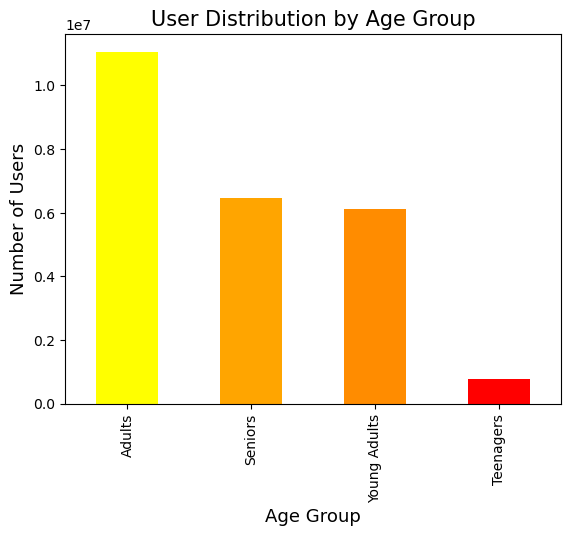

In [173]:
#create a bar chart to show distribution of different age group
age_colors = ['yellow', 'orange', 'darkorange', 'red']
age_bar= ords_prods_merge['age_group'].value_counts()
age_bar= age_bar.plot(kind='bar', color = age_colors) 
plt.xlabel("Age Group", fontsize=13)
plt.ylabel("Number of Users", fontsize=13)  
plt.title("User Distribution by Age Group", fontsize=15)


### Income Group Distribution

Text(0.5, 1.0, 'User Distribution by Income Group')

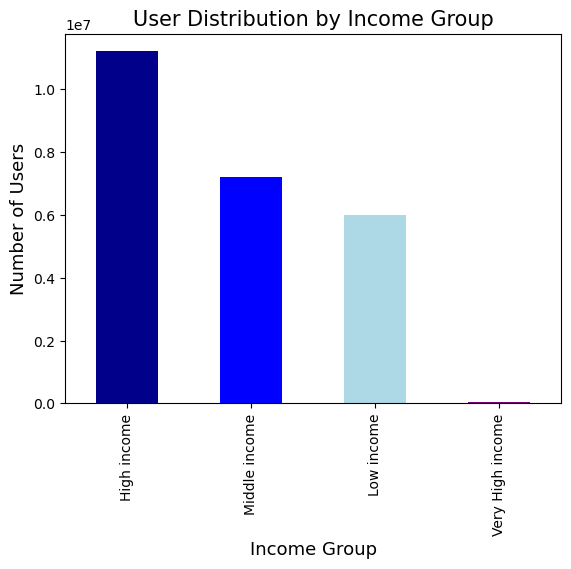

In [176]:
income_colors = ['darkblue', 'blue', 'lightblue', 'purple']
income_bar= ords_prods_merge['income_group'].value_counts()
income_bar= income_bar.plot(kind='bar', color = income_colors) 
plt.xlabel("Income Group", fontsize=13)
plt.ylabel("Number of Users", fontsize=13)  
plt.title("User Distribution by Income Group", fontsize=15)

### Parental Age Distribution

Text(0.5, 1.0, 'User Distribution by Parental Age')

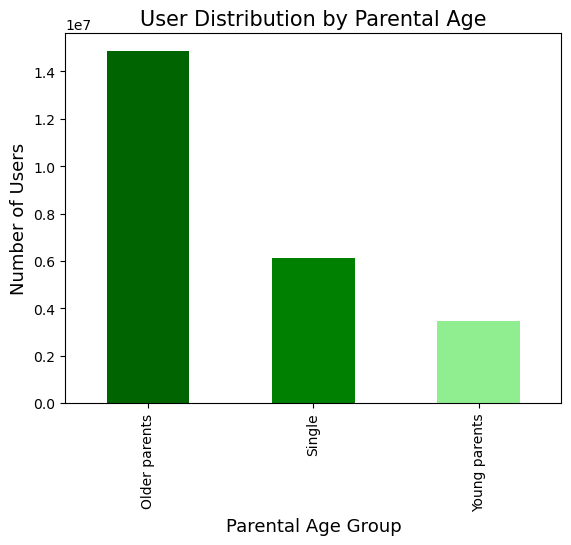

In [179]:
parents_colors = ['darkgreen', 'green', 'lightgreen', 'yellow']
parent_bar= ords_prods_merge['parental_age'].value_counts()
parent_bar= parent_bar.plot(kind='bar', color = parents_colors) 
plt.xlabel("Parental Age Group", fontsize=13)
plt.ylabel("Number of Users", fontsize=13)  
plt.title("User Distribution by Parental Age", fontsize=15)

### Regional Distribution

Text(0.5, 1.0, 'User Distribution by Regions')

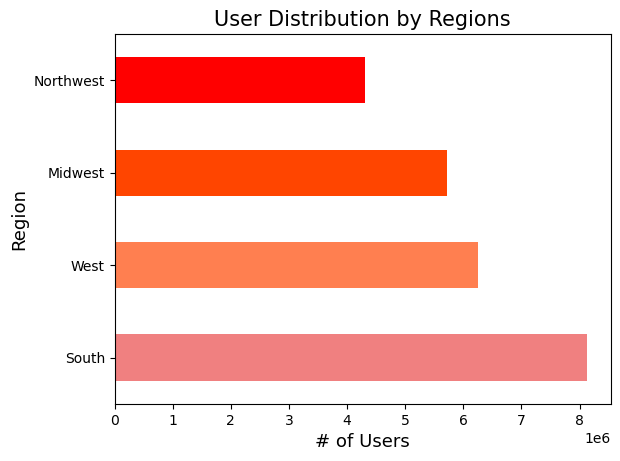

In [181]:
region_colors = ['lightcoral', 'coral', 'orangered', 'red'] 
region_bar= ords_prods_merge['region'].value_counts()
region_bar= region_bar.plot(kind='barh', color = region_colors) 
plt.xlabel("# of Users", fontsize=13)
plt.ylabel("Region", fontsize=13)
plt.title("User Distribution by Regions", fontsize=15)

## Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

### Age Group

#### Usage Frequency

In [38]:
#number of orders
age_group_orders = ords_prods_merge.groupby('age_group')['order_id'].nunique()

Text(0, 0.5, 'Age Group')

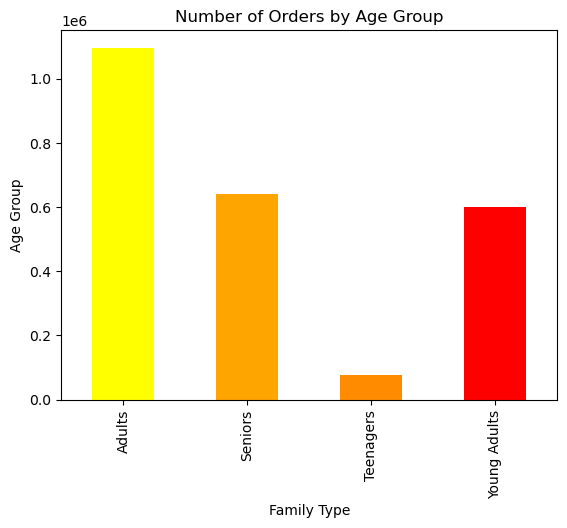

In [183]:
age_group_orders_bar = age_group_orders.sort_index().plot.bar(color = age_colors)
plt.title("Number of Orders by Age Group")
plt.xlabel("Family Type")
plt.ylabel("Age Group")

#### Max, mean, min of expenditure

In [61]:
age_group_agg = ords_prods_merge.groupby('age_group').agg({
    'order_id': 'count',
    'prices': ['min', 'mean', 'max']
})

age_group_agg

order_id prices                
                 count    min      mean   max
age_group                                    
Adults        11062657    1.0  7.791067  25.0
Seniors        6458450    1.0  7.796165  25.0
Teenagers       768773    1.0  7.808621  25.0
Young Adults   6124997    1.0  7.781915  25.0

### Income Group

#### User Frequency

In [62]:
income_group_orders = ords_prods_merge.groupby('income_group')['order_id'].nunique()

Text(0, 0.5, 'Number of Orders')

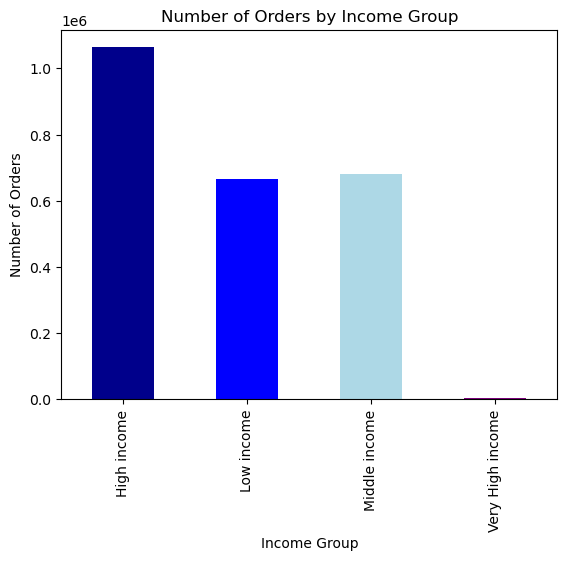

In [187]:
income_group_orders_bar = income_group_orders.sort_index().plot.bar(color = income_colors)
plt.title("Number of Orders by Income Group")
plt.xlabel("Income Group")
plt.ylabel("Number of Orders")

#### Max, mean, min of expenditure


In [64]:
income_group_agg = ords_prods_merge.groupby('income_group').agg({
    'order_id': 'count',
    'prices': ['min', 'mean', 'max']
})

income_group_agg

order_id prices                
                     count    min      mean   max
income_group                                     
High income       11186947    1.0  7.949787  25.0
Low income         5987365    1.0  7.303221  25.0
Middle income      7201803    1.0  7.949195  25.0
Very High income     38762    1.0  7.723860  25.0

### Parental Age

#### Frequency

In [65]:
parental_age_orders = ords_prods_merge.groupby('parental_age')['order_id'].nunique()

Text(0, 0.5, 'Parental Age')

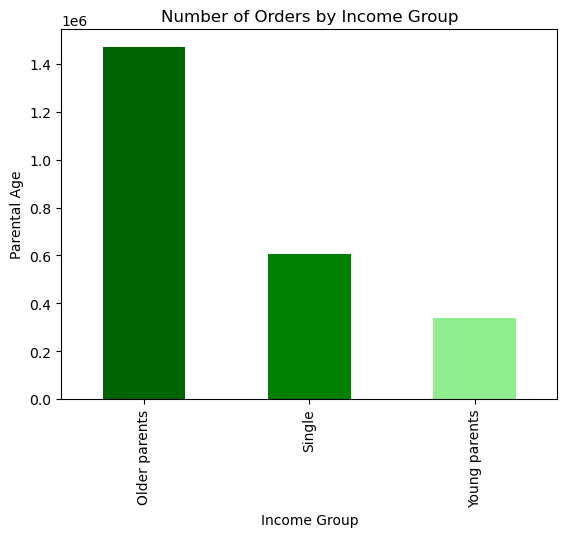

In [189]:
parental_age_orders_bar = parental_age_orders.sort_index().plot.bar(color = parents_colors)
plt.title("Number of Orders by Income Group")
plt.xlabel("Income Group")
plt.ylabel("Parental Age")

#### Max, mean, min of expenditure


In [82]:
parental_age_agg = ords_prods_merge.groupby('parental_age').agg({
    'order_id': 'count',
    'prices': ['min', 'mean', 'max']
})

parental_age_agg

order_id prices                
                  count    min      mean   max
parental_age                                  
Older parents  14857673    1.0  7.791888  25.0
Single          6105002    1.0  7.790987  25.0
Young parents   3452202    1.0  7.784884  25.0

### Region

#### Frequency

In [83]:
region_orders = ords_prods_merge.groupby('region')['order_id'].nunique()

Text(0, 0.5, 'Numer of Orders')

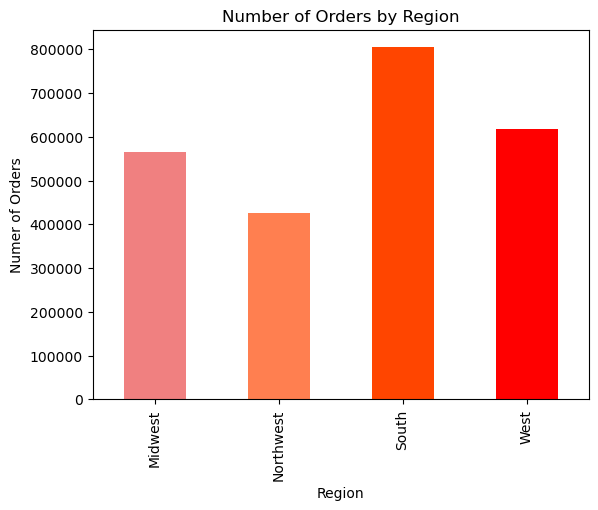

In [191]:
region_orders_bar = region_orders.sort_index().plot.bar(color = region_colors)
plt.title("Number of Orders by Region")
plt.xlabel("Region")
plt.ylabel("Numer of Orders")

In [89]:
region_agg = ords_prods_merge.groupby('region').agg({
    'order_id': 'count',
    'prices': ['min', 'mean', 'max']
})

region_agg

order_id prices                
             count    min      mean   max
region                                   
Midwest    5711756    1.0  7.790719  25.0
Northwest  4315271    1.0  7.781979  25.0
South      8129086    1.0  7.795570  25.0
West       6258764    1.0  7.790263  25.0

### Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

### Age Group

#### Region

In [91]:
#Age by Region
age_by_region = pd.crosstab(ords_prods_merge['age_group'],ords_prods_merge['region'], dropna = False)

In [93]:
age_by_region

region,Midwest,Northwest,South,West
age_group,,,,
Adults,2632963,1908332,3666509,2854853
Seniors,1492752,1176879,2133592,1655227
Teenagers,167648,138688,260635,201802
Young Adults,1418393,1091372,2068350,1546882


Text(0, 0.5, 'Numer of Users')

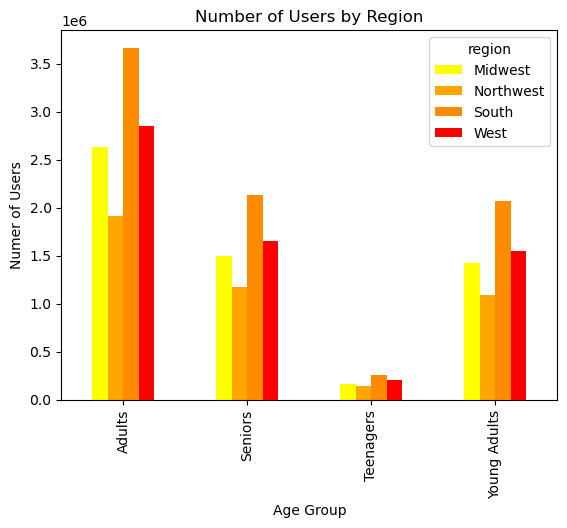

In [194]:
age_by_region_bar = age_by_region.plot.bar(color = age_colors)
plt.title("Number of Users by Region")
plt.xlabel("Age Group")
plt.ylabel("Numer of Users")

#### Department

In [135]:
#age group by department 
age_by_department = pd.crosstab(ords_prods_merge['department'],ords_prods_merge['age_group'], dropna = False)

In [136]:
age_by_department


age_group,Adults,Seniors,Teenagers,Young Adults
department,,,,
alcohol,49231,26989,4472,27280
babies,157160,86418,10442,81927
bakery,400548,232934,27227,222621
beverages,925425,542033,62947,506042
breakfast,238087,136742,16809,133307
bulk,12266,7385,887,7020
canned goods,356548,207911,24865,198466
dairy eggs,1860256,1087804,129985,1042443
deli,354759,206632,24201,197419


Text(0, 0.5, 'Department')

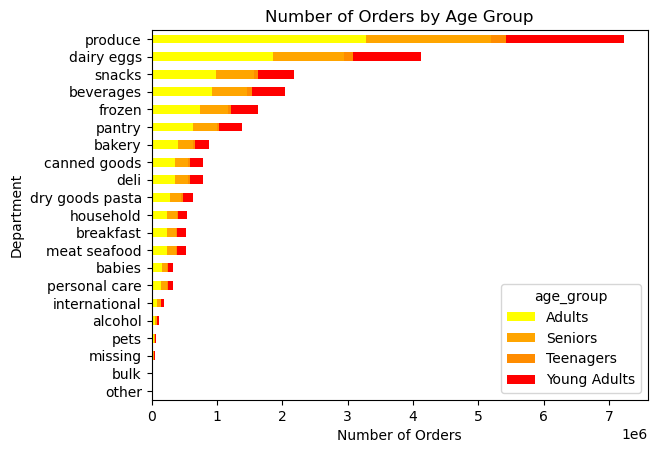

In [200]:
age_by_department_sorted = age_by_department.sort_values(by=['Adults'], ascending=True)
age_by_department_bar= age_by_department_sorted.plot.barh(color = age_colors, stacked = True)
plt.title("Number of Orders by Age Group")
plt.xlabel("Number of Orders")
plt.ylabel("Department")

### Income Group

In [102]:
#Income by Region
income_by_region = pd.crosstab(ords_prods_merge['income_group'],ords_prods_merge['region'], dropna = False)

In [103]:
income_by_region

region,Midwest,Northwest,South,West
income_group,,,,
High income,2670905,1984433,3670181,2861428
Low income,1379289,1061432,2008939,1537705
Middle income,1647566,1263890,2440191,1850156
Very High income,13996,5516,9775,9475


Text(0, 0.5, 'Number of Users')

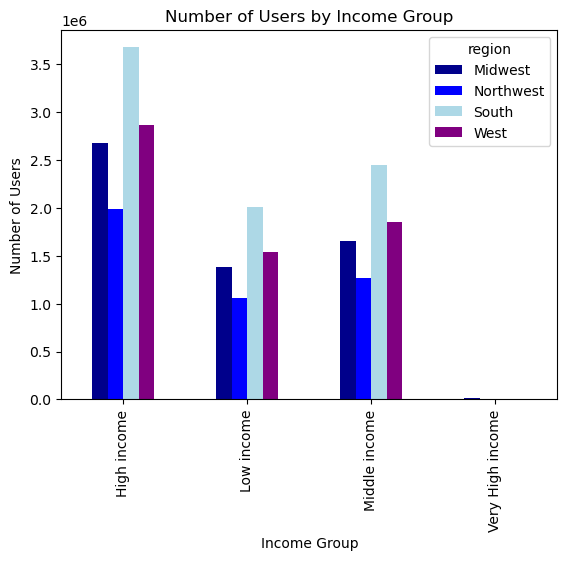

In [202]:

income_by_region_bar = income_by_region.plot.bar(color = income_colors)
plt.title("Number of Users by Income Group")
plt.xlabel("Income Group")
plt.ylabel("Number of Users")

#### Department

In [142]:
#income group by department 
income_by_department = pd.crosstab(ords_prods_merge['department'],ords_prods_merge['income_group'], dropna = False)
income_by_department

income_group,High income,Low income,Middle income,Very High income
department,,,,
alcohol,51304,26342,29088,1238
babies,161043,67214,107369,321
bakery,415339,204161,262131,1699
beverages,890836,579627,562213,3771
breakfast,232315,145126,146624,880
bulk,11687,7629,8238,4
canned goods,377508,168868,239870,1544
dairy eggs,1910288,960183,1243454,6563
deli,360386,188908,232662,1055


Text(0, 0.5, 'Department')

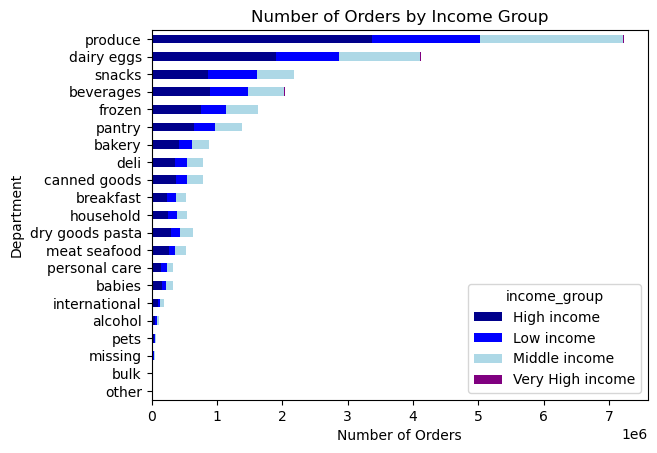

In [204]:
income_by_department_sorted = income_by_department.sort_values(by=['Low income'], ascending=True)
income_by_department_bar = income_by_department_sorted.plot.barh(color = income_colors, stacked = True)
plt.title("Number of Orders by Income Group")
plt.xlabel("Number of Orders")
plt.ylabel("Department")

### Parental Age

In [130]:
#prental age by region
parentsage_by_region = pd.crosstab(ords_prods_merge['parental_age'],ords_prods_merge['region'], dropna = False)

In [110]:
parentsage_by_region

region,Midwest,Northwest,South,West
parental_age,,,,
Older parents,3466341,2646355,4932671,3812306
Single,1436961,1065138,2038334,1564569
Young parents,808454,603778,1158081,881889


Text(0, 0.5, 'Numer of Users')

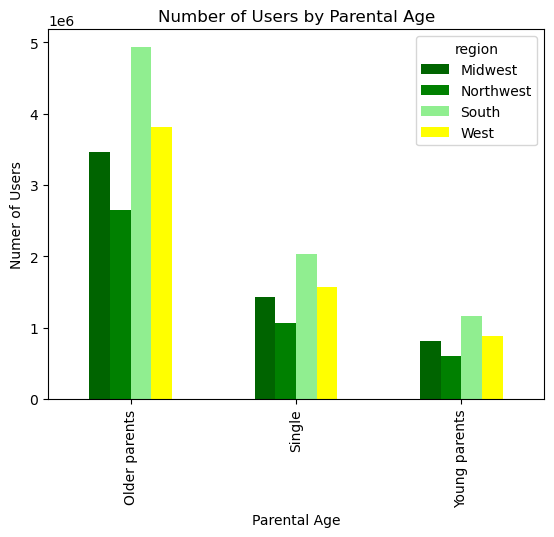

In [207]:
parentsage_by_region_bar = parentsage_by_region.plot.bar(color = parents_colors)
plt.title("Number of Users by Parental Age")
plt.xlabel("Parental Age")
plt.ylabel("Numer of Users")

#### Department

In [147]:
#parental age by department 
parentage_by_department = pd.crosstab(ords_prods_merge['department'],ords_prods_merge['parental_age'], dropna = False)
parentage_by_department

parental_age,Older parents,Single,Young parents
department,,,
alcohol,63777,27959,16236
babies,205024,84313,46610
bakery,536742,221599,124989
beverages,1241065,512055,283327
breakfast,318711,130160,76074
bulk,16920,6585,4053
canned goods,479525,195449,112816
dairy eggs,2503765,1030238,586485
deli,474569,197994,110448


Text(0, 0.5, 'Department')

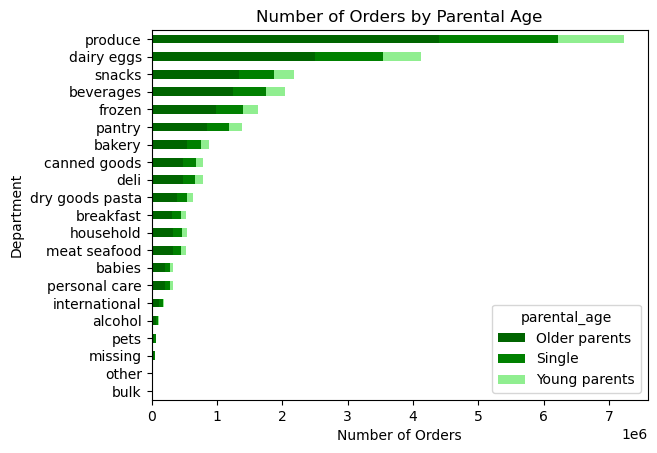

In [209]:
parentage_by_department_sorted = parentage_by_department.sort_values(by=['Young parents'], ascending=True)
parentage_by_department_bar = parentage_by_department_sorted.plot.barh(color = parents_colors, stacked = True)
plt.title("Number of Orders by Parental Age")
plt.xlabel("Number of Orders")
plt.ylabel("Department")

#### Export Visualization

In [174]:
#export the visualization 
age_bar.figure.savefig(os.path.join(path, '04 Analysis','01 Visualizations', 'age_group_dist_bar.png'))

In [177]:
income_bar.figure.savefig(os.path.join(path, '04 Analysis','01 Visualizations', 'income_group_dist_bar.png'))

In [180]:
parent_bar.figure.savefig(os.path.join(path, '04 Analysis','01 Visualizations', 'parental_age_dist_bar.png'))

In [182]:
region_bar.figure.savefig(os.path.join(path, '04 Analysis','01 Visualizations', 'region_dist_bar.png'))

In [186]:
age_group_orders_bar.figure.savefig(os.path.join(path, '04 Analysis','01 Visualizations', 'age_group_order_num.png'))

In [188]:
income_group_orders_bar.figure.savefig(os.path.join(path, '04 Analysis','01 Visualizations', 'income_group_order_num.png'))

In [190]:
parental_age_orders_bar.figure.savefig(os.path.join(path, '04 Analysis','01 Visualizations', 'parental_age_order_num.png'))

In [192]:
region_orders_bar.figure.savefig(os.path.join(path, '04 Analysis','01 Visualizations', 'region_order_num.png'))

In [195]:
age_by_region_bar.figure.savefig(os.path.join(path, '04 Analysis','01 Visualizations', 'age_by_region.png'))

In [201]:
age_by_department_bar.figure.savefig(os.path.join(path, '04 Analysis','01 Visualizations', 'age_by_department.png'))

In [205]:
income_by_region_bar.figure.savefig(os.path.join(path, '04 Analysis','01 Visualizations', 'income_by_region.png'))

In [206]:
income_by_department_bar.figure.savefig(os.path.join(path, '04 Analysis','01 Visualizations', 'income_by_department.png'))

In [208]:
parentsage_by_region_bar.figure.savefig(os.path.join(path, '04 Analysis','01 Visualizations', 'parental_age_region.png'))

In [210]:
parentage_by_department_bar.figure.savefig(os.path.join(path, '04 Analysis','01 Visualizations', 'parental_age_department.png'))

#### Export Final Dataset

In [214]:
#export
ords_prods_merge.to_pickle(os.path.join(path, '02 Data','02 Prepared Data', 'orders_products_all_merged.pkl'))

In [215]:
ords_prods_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24414877 entries, 0 to 24414876
Data columns (total 35 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   product_id              int64   
 1   product_name            object  
 2   aisle_id                int64   
 3   department_id           int64   
 4   prices                  float64 
 5   order_id                int64   
 6   user_id                 int64   
 7   order_number            int64   
 8   orders_day_of_week      int64   
 9   order_hour_of_day       int64   
 10  days_since_last_order   float64 
 11  new_customer            bool    
 12  add_to_cart_order       int64   
 13  reordered               int64   
 14  _merge                  category
 15  busiest_days            object  
 16  loyalty_flag            object  
 17  spending_flag           object  
 18  order_frequency_flag    object  
 19  avg_price               float64 
 20  purchase_frequency      float64 
 21  gender

# Extra Visualization

In [241]:
order_day_of_week_by_region = pd.crosstab(ords_prods_merge['orders_day_of_week'],ords_prods_merge['region'], dropna = False)

Text(0, 0.5, 'Order Counts')

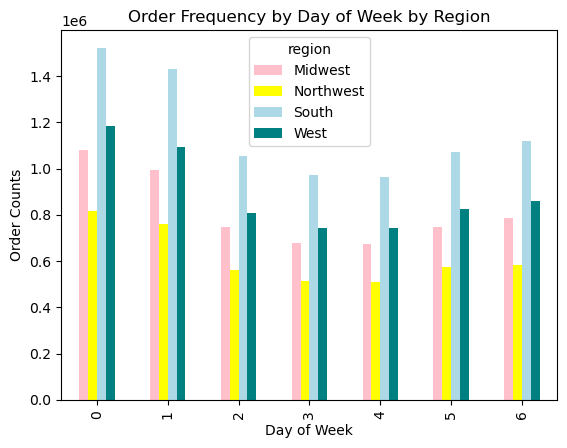

In [242]:
order_day_of_week_by_region = order_day_of_week_by_region.plot.bar(color=region_color)
plt.title('Order Frequency by Day of Week by Region')
plt.xlabel("Day of Week")
plt.ylabel("Order Counts")

In [239]:
order_hour_of_day_by_region = pd.crosstab(ords_prods_merge['order_hour_of_day'],ords_prods_merge['region'], dropna = False)

Text(0, 0.5, 'Order Counts')

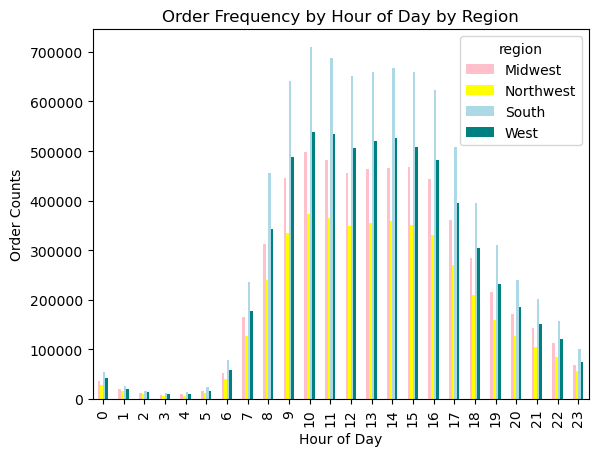

In [243]:
order_hour_of_day_by_region = order_hour_of_day_by_region.plot.bar(color=region_color)
plt.title('Order Frequency by Hour of Day by Region')
plt.xlabel("Hour of Day")
plt.ylabel("Order Counts")

In [237]:
region_color = ['pink', 'yellow', 'lightblue', 'teal']

In [244]:
region_by_department = pd.crosstab(ords_prods_merge['department'],ords_prods_merge['region'], dropna = False)

Text(0, 0.5, 'Department')

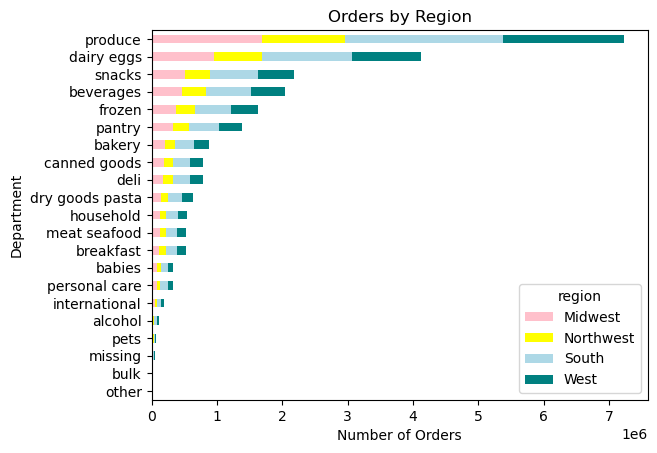

In [251]:
region_by_department_sorted = region_by_department.sort_values(by=['Midwest'], ascending=True)
region_by_department_bar = region_by_department_sorted.plot.barh(color = region_color, stacked = True)
plt.title("Orders by Region")
plt.xlabel("Number of Orders")
plt.ylabel("Department")

Text(0, 0.5, 'Counts')

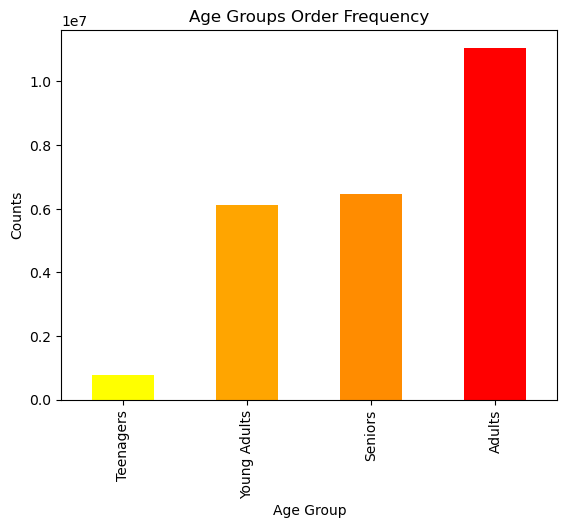

In [263]:
age_group_order_frequency_bar = ords_prods_merge['age_group'].value_counts().sort_values(ascending=True).plot.bar(color = age_colors)
plt.title("Age Groups Order Frequency")
plt.xlabel("Age Group")
plt.ylabel("Counts")

In [255]:
age_group_family_status = pd.crosstab(ords_prods_merge['age_group'],ords_prods_merge['fam_status'], dropna = False)

In [256]:
age_group_family_status

fam_status,divorced/widowed,living with parents and siblings,married,single
age_group,,,,
Adults,494851,0,8264276,2303530
Seniors,1594361,0,4864089,0
Teenagers,0,593837,0,174936
Young Adults,0,577562,4010111,1537324


Text(0, 0.5, 'Counts')

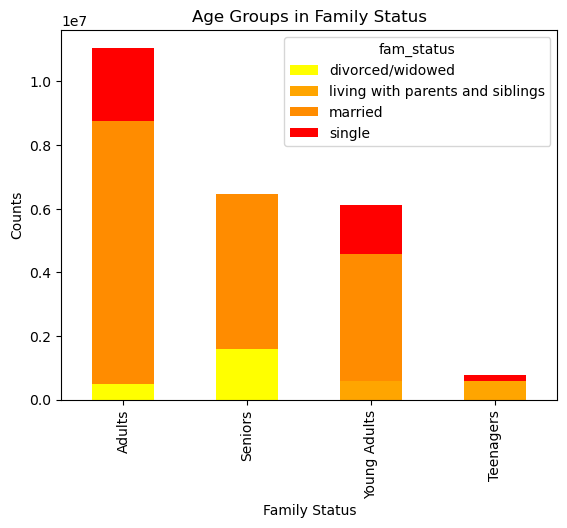

In [262]:
age_group_family_status_sorted = age_group_family_status.sort_values(by=['living with parents and siblings'], ascending=True)
age_group_family_status_bar = age_group_family_status_sorted.plot.bar(color = age_colors, stacked = True)
plt.title("Age Groups in Family Status")
plt.xlabel("Family Status")
plt.ylabel("Counts")

In [268]:
order_day_of_week_by_age_group = pd.crosstab(ords_prods_merge['orders_day_of_week'],ords_prods_merge['age_group'], dropna = False)

Text(0, 0.5, 'Order Counts')

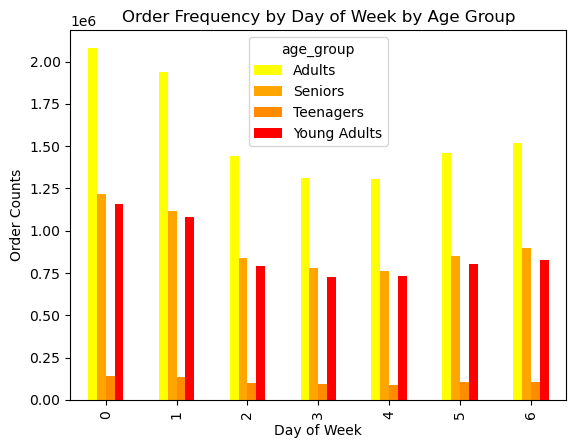

In [269]:
order_day_of_week_by_age_group = order_day_of_week_by_age_group.plot.bar(color=age_colors)
plt.title('Order Frequency by Day of Week by Age Group')
plt.xlabel("Day of Week")
plt.ylabel("Order Counts")

In [273]:
order_hour_of_day_by_age_group = pd.crosstab(ords_prods_merge['order_hour_of_day'],ords_prods_merge['age_group'], dropna = False)

Text(0, 0.5, 'Order Counts')

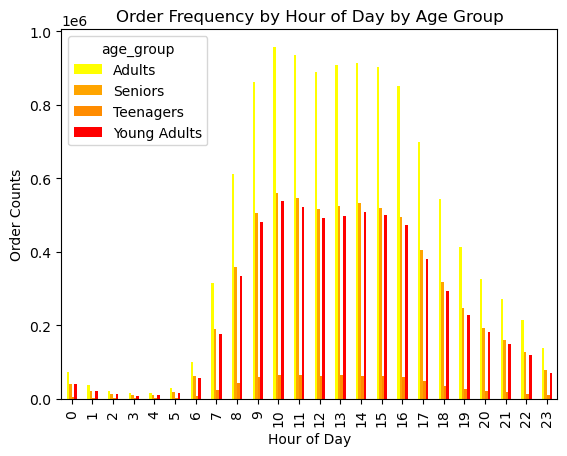

In [274]:
order_hour_of_day_by_age_group = order_hour_of_day_by_age_group.plot.bar(color=age_colors)
plt.title('Order Frequency by Hour of Day by Age Group')
plt.xlabel("Hour of Day")
plt.ylabel("Order Counts")

In [284]:
region_mean_agg = ords_prods_merge.groupby('region').agg({
    'prices': ['mean']
})

region_mean_agg



,prices
,mean
region,
Midwest,7.790719
Northwest,7.781979
South,7.795570
West,7.790263


In [296]:
region_counts_agg = ords_prods_merge.groupby('region').agg({
    'prices': ['count']
})

region_counts_agg

,prices
,count
region,
Midwest,5710796
Northwest,4314683
South,8127783
West,6257904


Text(0, 0.5, 'Region')

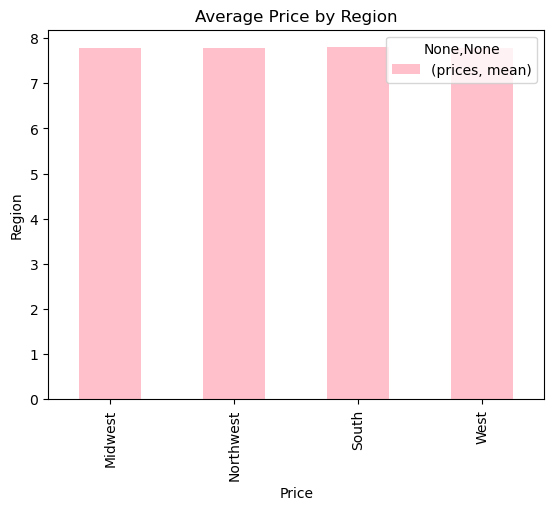

In [288]:
region_mean_agg.plot.bar(color=region_color)
plt.title('Average Price by Region')
plt.xlabel("Price")
plt.ylabel("Region")

In [289]:
income_mean_agg = ords_prods_merge.groupby('income_group').agg({
    'prices': ['mean']
})

income_mean_agg


,prices
,mean
income_group,
High income,7.949787
Low income,7.303221
Middle income,7.949195
Very High income,7.723860


Text(0, 0.5, 'Price')

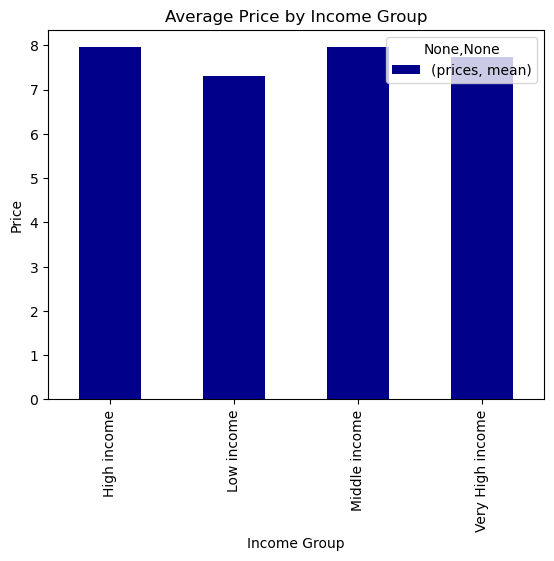

In [291]:
income_mean_agg.plot.bar(color=income_colors)
plt.title('Average Price by Income Group')
plt.xlabel("Income Group")
plt.ylabel("Price")

In [292]:
age_mean_agg = ords_prods_merge.groupby('age_group').agg({
    'prices': ['mean']
})
age_mean_agg

,prices
,mean
age_group,
Adults,7.791067
Seniors,7.796165
Teenagers,7.808621
Young Adults,7.781915


Text(0, 0.5, 'Price')

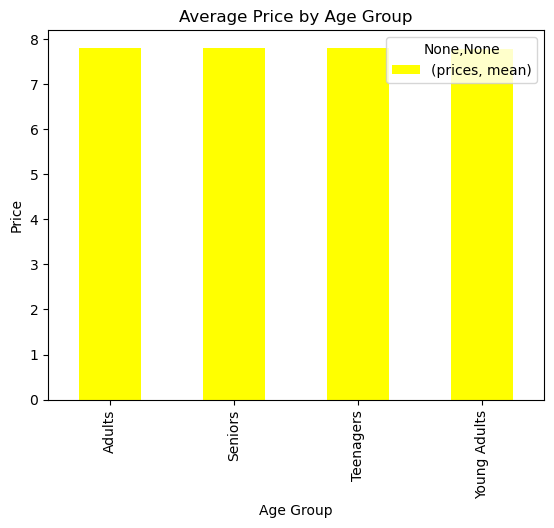

In [293]:
age_mean_agg.plot.bar(color=age_colors)
plt.title('Average Price by Age Group')
plt.xlabel("Age Group")
plt.ylabel("Price")

In [294]:
parents_mean_agg = ords_prods_merge.groupby('parental_age').agg({
    'prices': ['mean']
})
parents_mean_agg

,prices
,mean
parental_age,
Older parents,7.791888
Single,7.790987
Young parents,7.784884


Text(0, 0.5, 'Price')

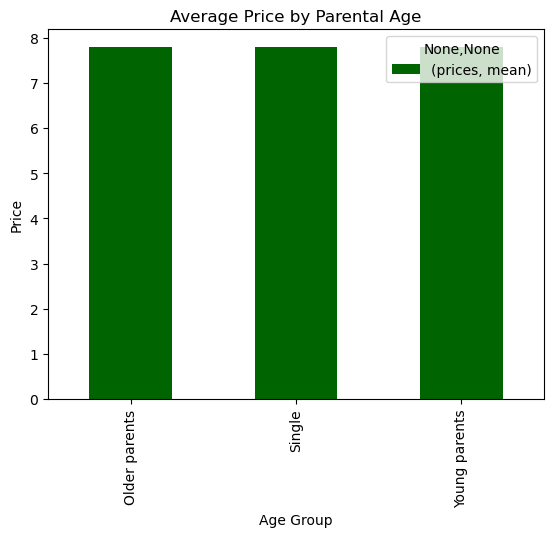

In [295]:
parents_mean_agg.plot.bar(color=parents_colors)
plt.title('Average Price by Parental Age')
plt.xlabel("Age Group")
plt.ylabel("Price")

In [298]:
ords_prods_merge['order_frequency_flag'].value_counts(dropna =False)

Frequent customer        18136758
Regular customer          4814601
Non-frequent customer     1463518
Name: order_frequency_flag, dtype: int64

In [299]:
age_group_frequent_cust = pd.crosstab(ords_prods_merge['age_group'],ords_prods_merge['order_frequency_flag'], dropna = False)
age_group_frequent_cust

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
age_group,,,
Adults,8212366,667327,2182964
Seniors,4814656,382791,1261003
Teenagers,573276,46744,148753
Young Adults,4536460,366656,1221881


Text(0, 0.5, 'Counts')

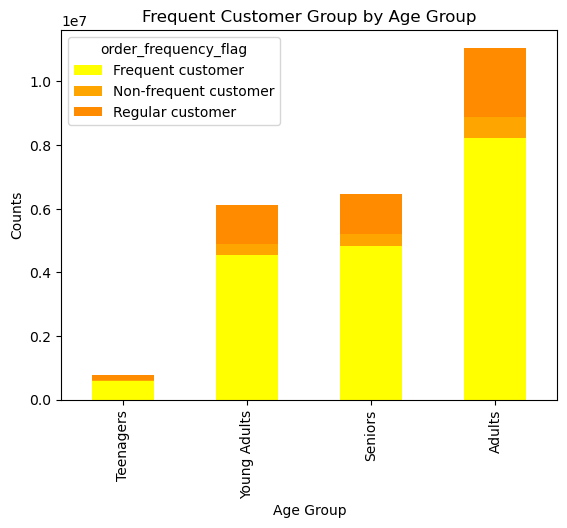

In [301]:
age_group_frequent_cust_sorted = age_group_frequent_cust.sort_values(by=['Frequent customer'], ascending=True)
age_group_frequent_cust_sorted.plot.bar(color = age_colors, stacked = True)
plt.title("Frequent Customer Group by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Counts")

In [302]:
income_group_frequent_cust = pd.crosstab(ords_prods_merge['income_group'],ords_prods_merge['order_frequency_flag'], dropna = False)
income_group_frequent_cust

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
income_group,,,
High income,8339292,649880,2197775
Low income,4404316,395422,1187627
Middle income,5364160,416573,1421070
Very High income,28990,1643,8129


Text(0, 0.5, 'Counts')

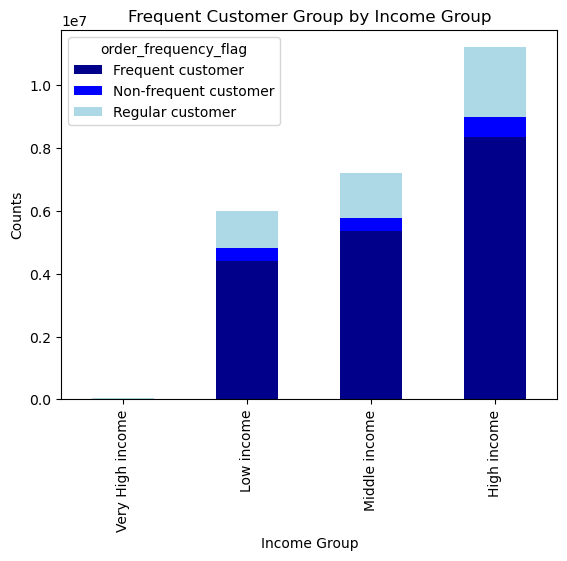

In [305]:
income_group_frequent_cust_sorted = income_group_frequent_cust.sort_values(by=['Frequent customer'], ascending=True)
income_group_frequent_cust_sorted.plot.bar(color = income_colors, stacked = True)
plt.title("Frequent Customer Group by Income Group")
plt.xlabel("Income Group")
plt.ylabel("Counts")

In [306]:
region_frequent_cust = pd.crosstab(ords_prods_merge['region'],ords_prods_merge['order_frequency_flag'], dropna = False)
region_frequent_cust

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
region,,,
Midwest,4213478,350154,1148124
Northwest,3204565,250508,860198
South,6049059,490297,1589730
West,4669656,372559,1216549


Text(0, 0.5, 'Counts')

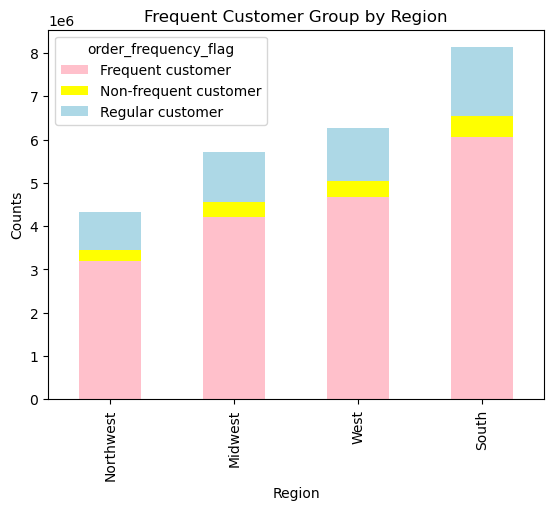

In [309]:
region_frequent_cust_sorted = region_frequent_cust.sort_values(by=['Frequent customer'], ascending=True)
region_frequent_cust_sorted.plot.bar(color = region_color, stacked = True)
plt.title("Frequent Customer Group by Region")
plt.xlabel("Region")
plt.ylabel("Counts")

In [310]:
parentage_frequent_cust = pd.crosstab(ords_prods_merge['parental_age'],ords_prods_merge['order_frequency_flag'], dropna = False)
parentage_frequent_cust

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
parental_age,,,
Older parents,11031574,897176,2928923
Single,4524510,361313,1219179
Young parents,2580674,205029,666499


Text(0, 0.5, 'Counts')

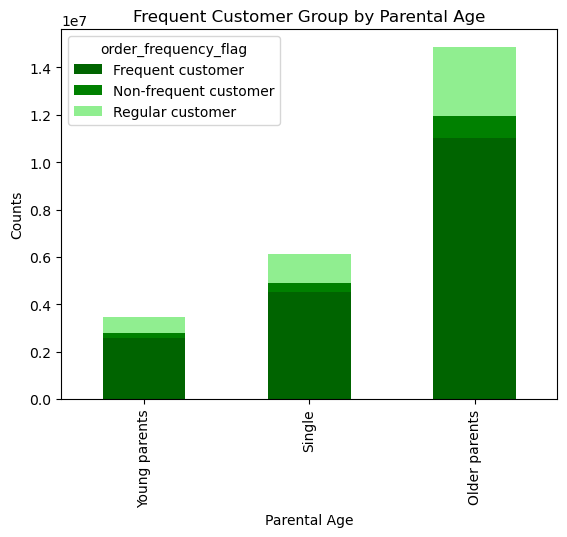

In [317]:
parentage_frequent_cust_sorted = parentage_frequent_cust.sort_values(by=['Frequent customer'], ascending=True)
parentage_frequent_cust_sorted.plot.bar(color = parents_colors, stacked = True)
plt.title("Frequent Customer Group by Parental Age")
plt.xlabel("Parental Age")
plt.ylabel("Counts")